In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [8]:
df1 = df.drop(['RowNumber', 'CustomerId','Surname'], axis =1)
df1

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [9]:
df1.shape

(10000, 11)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
df1.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

In [13]:
df1.corr()

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

Text(0.5, 1.0, 'Correlations between features')

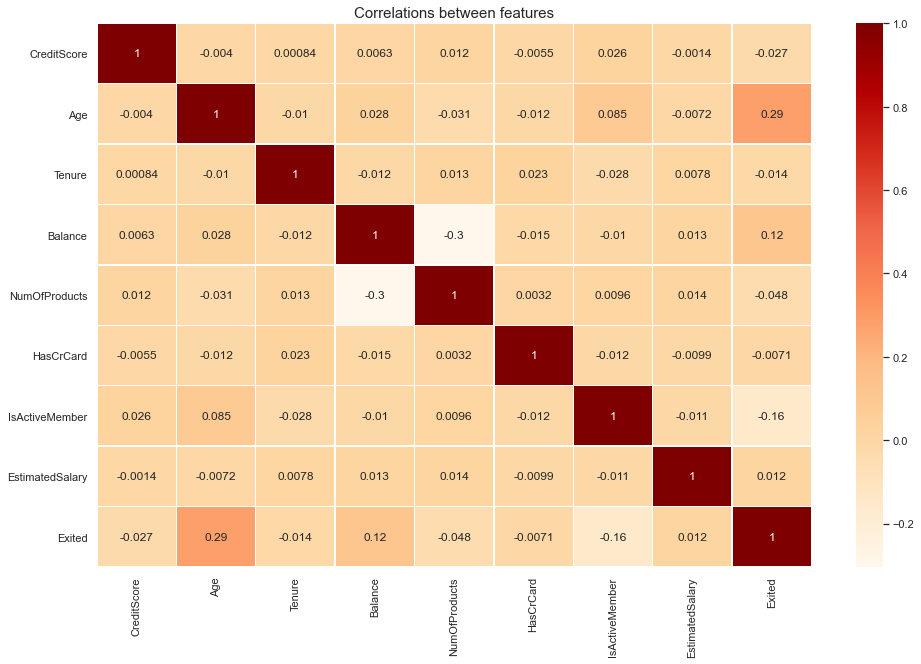

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(df1.corr(),cmap='OrRd', annot=True,linewidths=0.4)
plt.title("Correlations between features", fontsize=15)

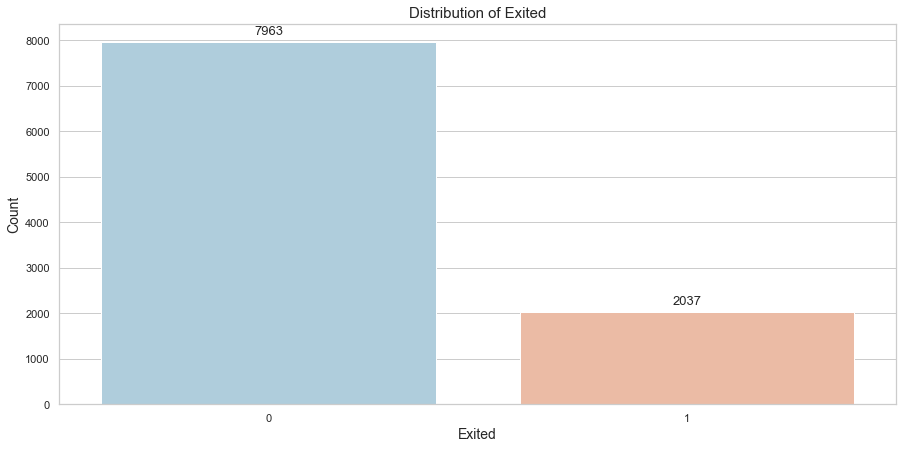

In [132]:
#lets findout the distribution of Churn: Yes and No's First
plt.figure(figsize=(15,7))
vis1 =sns.countplot(df1['Exited'],palette='RdBu_r')
plt.title('Distribution of Exited',fontsize=15)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('Count',fontsize=14)

for i in vis1.patches:
    vis1.annotate(format(i.get_height(),'.0f'),(i.get_x() + i.get_width()/2.,i.get_height()),
                 ha='center', va='center',xytext =(0,10),textcoords='offset points',fontsize=13)

# Observation:

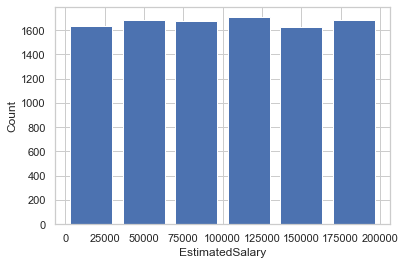

In [21]:
##Let's see this through dist plot
plt.hist(df1.EstimatedSalary, bins=6, rwidth=0.8)
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.show()

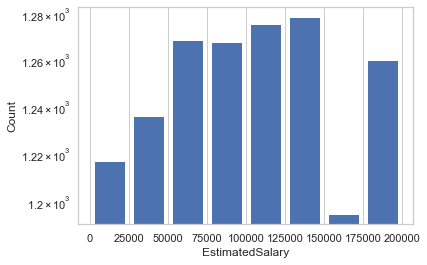

In [23]:
plt.hist(df1.EstimatedSalary, bins=8, rwidth=0.8)
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [24]:
#Detect and remove outliners of EstimatedSalary
MaxThershold = df1['EstimatedSalary'].quantile(0.999)
MaxThershold

199775.69996000003

In [25]:
MinThershold = df1['EstimatedSalary'].quantile(0.015)
MinThershold

2920.6087

In [27]:
df2 = df1[(df1.EstimatedSalary < MaxThershold) & (df1.EstimatedSalary>MinThershold)]
df2.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [28]:
df2.shape

(9840, 11)

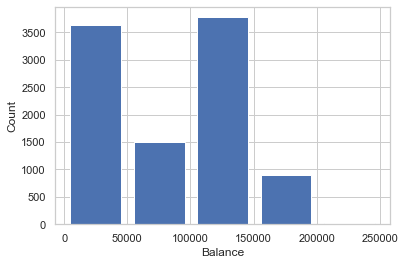

In [29]:
#Detect and remove outliner in Balance
plt.hist(df2.Balance, bins = 5,rwidth=0.8)
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

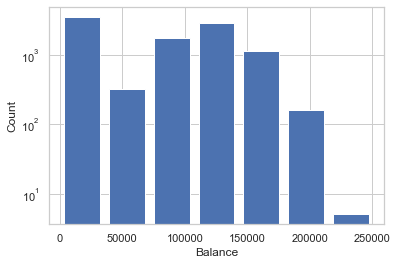

In [31]:
plt.hist(df2.Balance, bins = 7,rwidth=0.8)
plt.xlabel('Balance')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [32]:
MaxThershold = df2['Balance'].quantile(0.999)
MaxThershold

212375.03934000072

In [33]:
MinThershold = df2['Balance'].quantile(0.370)
MinThershold

52909.458799999964

In [36]:
df3 = df2[(df2.Balance < MaxThershold) & (df2.Balance>MinThershold)]
df3.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
4          850     Spain  Female   43       2  125510.82              1   
5          645     Spain    Male   44       8  113755.78              2   
7          376   Germany  Female   29       4  115046.74              4   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
4          1               1         79084.10       0  
5          1               0        149756.71       1  
7          1               0        119346.88       1

In [37]:
df3.shape

(6189, 11)

In [38]:
df3.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [39]:
df3.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [40]:
#Findout Missing value

statistics_of_data = []
for col in df3.columns:
    statistics_of_data.append((col,
                                df3[col].isnull().sum()*100/df3.shape[0],
                                df3[col].dtype))
    stats_df = pd.DataFrame(statistics_of_data,columns=['Feature','missing_val','type'])

In [41]:
stats_df.sort_values('missing_val', ascending = False)

Feature  missing_val     type
0       CreditScore          0.0    int64
1         Geography          0.0   object
2            Gender          0.0   object
3               Age          0.0    int64
4            Tenure          0.0    int64
5           Balance          0.0  float64
6     NumOfProducts          0.0    int64
7         HasCrCard          0.0    int64
8    IsActiveMember          0.0    int64
9   EstimatedSalary          0.0  float64
10           Exited          0.0    int64

In [49]:
#Seperate out Numerical
numerical_features = [feature for feature in df3.columns if df3[feature].dtypes != 'O' ]
print(len(numerical_features))
df3[numerical_features].head()

9


CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
4          850   43       2  125510.82              1          1   
5          645   44       8  113755.78              2          1   
7          376   29       4  115046.74              4          1   

   IsActiveMember  EstimatedSalary  Exited  
1               1        112542.58       0  
2               0        113931.57       1  
4               1         79084.10       0  
5               0        149756.71       1  
7               0        119346.88       1

In [51]:
#1. Continus valriable and Discrete Variable

discrete_feature = [feature for feature in numerical_features if len(df3[feature].unique()) < 25]
print(len(discrete_feature))
discrete_feature

5


['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

In [54]:
##2.Continus valriable

continous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous Feature Count: {}".format(len(continous_feature)))
df3[continous_feature].head()

Continuous Feature Count: 4


CreditScore  Age    Balance  EstimatedSalary
1          608   41   83807.86        112542.58
2          502   42  159660.80        113931.57
4          850   43  125510.82         79084.10
5          645   44  113755.78        149756.71
7          376   29  115046.74        119346.88

In [57]:
def print_unique_col_values(df):
    i=1
    for column in df:
        str = "{i}.{a} column have {b} unique values"
        print(str.format(i=i, a=column,b=df[column].unique()))
        i =i+1

In [58]:
print_unique_col_values(df3[discrete_feature])

1.Tenure column have [ 1  8  2  4  6  3  0  7  9  5 10] unique values
2.NumOfProducts column have [1 3 2 4] unique values
3.HasCrCard column have [0 1] unique values
4.IsActiveMember column have [1 0] unique values
5.Exited column have [0 1] unique values


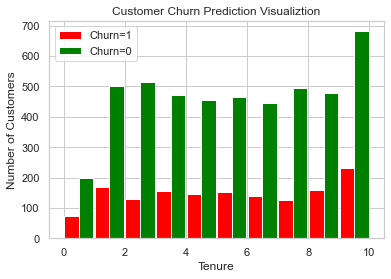

In [59]:
#Now lets create visuals for comparison of continous/ discrete and target variable

tenure_churn_no = df3[df3.Exited == 0].Tenure
tenure_churn_yes = df3[df3.Exited == 1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes,tenure_churn_no], rwidth = 0.95, color = ['red','green'],label=['Churn=1','Churn=0'])
plt.legend()

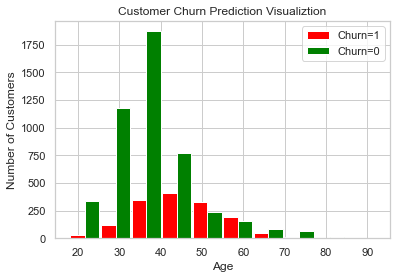

In [62]:
Age_churn_no = df3[df3.Exited == 0].Age
Age_churn_yes = df3[df3.Exited == 1].Age

plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([Age_churn_yes,Age_churn_no], rwidth = 0.95, color = ['red','green'],label=['Churn=1','Churn=0'])
plt.legend()

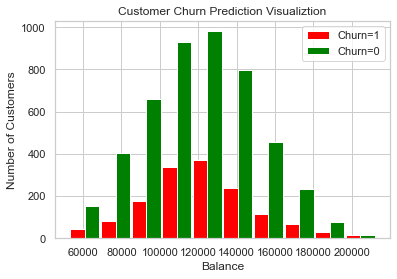

In [63]:
Balance_churn_no = df3[df3.Exited == 0].Balance
Balance_churn_yes = df3[df3.Exited == 1].Balance

plt.xlabel("Balance")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([Balance_churn_yes,Balance_churn_no], rwidth = 0.95, color = ['red','green'],label=['Churn=1','Churn=0'])
plt.legend()

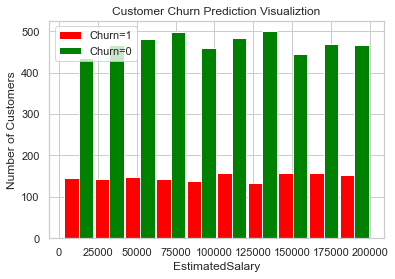

In [64]:
EstimatedSalary_churn_no = df3[df3.Exited == 0].EstimatedSalary
EstimatedSalary_churn_yes = df3[df3.Exited == 1].EstimatedSalary

plt.xlabel("EstimatedSalary")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([EstimatedSalary_churn_yes,EstimatedSalary_churn_no], rwidth = 0.95, color = ['red','green'],label=['Churn=1','Churn=0'])
plt.legend()

In [65]:
#Now lets seperate our categorial feature so that we can add other transformation upon them

categoricalVariable = [feature for feature in df3.columns if df2[feature].dtype == 'O']
len(categoricalVariable)

2

In [66]:
df3[categoricalVariable].head()

Geography  Gender
1     Spain  Female
2    France  Female
4     Spain  Female
5     Spain    Male
7   Germany  Female

In [68]:
df3['Gender'].replace({'Female' :1, 'Male':0}, inplace=True)

In [70]:
df3.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1          608     Spain       1   41       1   83807.86              1   
2          502    France       1   42       8  159660.80              3   
4          850     Spain       1   43       2  125510.82              1   
5          645     Spain       0   44       8  113755.78              2   
7          376   Germany       1   29       4  115046.74              4   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
4          1               1         79084.10       0  
5          1               0        149756.71       1  
7          1               0        119346.88       1

In [71]:
df4 = pd.get_dummies(data=df3, columns=['Geography'])
df4.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [72]:
df4.shape

(6189, 13)

In [73]:
df4.sample(5)

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1599          670       1   42       1  115961.58              2          0   
8801          510       1   52       6  191665.21              1          1   
5441          751       0   29       1  135536.50              1          1   
7475          698       0   31       1  156111.24              1          0   
8026          607       1   33       8   91301.72              1          0   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
1599               1         29483.87       0                 1   
8801               1        131312.56       1                 1   
5441               0         66825.33       0                 1   
7475               0        134790.74       0                 1   
8026               1        130824.57       0                 1   

      Geography_Germany  Geography_Spain  
1599                  0                0  
8801                  0                0  
5441                  0                0  
7475                  0                0  
8026                  0                0

In [74]:
#Data Scaling of continous data

continous_feature

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [90]:
#Data Scaling --->Continus data Only

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df4[continous_feature] = scaler.fit_transform(df4[continous_feature])

In [91]:
i=1
for col in df4:
    str ="{i}.{a} column have {b} unique values"
    print(str.format(i=i, a=col,b=df4[col].unique()))
    i=i+1

1.CreditScore column have [0.516 0.304 1.    0.59  0.052 0.302 0.668 0.356 0.532 0.606 0.812 0.448
 0.122 0.366 0.406 0.25  0.28  0.908 0.464 0.23  0.412 0.968 0.62  0.852
 0.958 0.574 0.4   0.696 0.47  0.61  0.502 0.538 0.612 0.75  0.784 0.674
 0.41  0.506 0.802 0.462 0.77  0.622 0.65  0.776 0.614 0.508 0.814 0.132
 0.63  0.312 0.8   0.57  0.916 0.33  0.846 0.928 0.544 0.87  0.51  0.258
 0.67  0.376 0.424 0.742 0.556 0.636 0.348 0.698 0.956 0.648 0.164 0.55
 0.84  0.89  0.878 0.478 0.222 0.458 0.664 0.27  0.6   0.378 0.592 0.562
 0.734 0.9   0.666 0.708 0.53  0.268 0.26  0.456 0.512 0.494 0.808 0.856
 0.76  0.73  0.324 0.46  0.342 0.818 0.722 0.536 0.642 0.678 0.652 0.444
 0.914 0.752 0.64  0.394 0.488 0.834 0.826 0.706 0.618 0.844 0.568 0.778
 0.842 0.388 0.686 0.764 0.414 0.362 0.766 0.922 0.724 0.898 0.504 0.788
 0.794 0.728 0.322 0.634 0.558 0.528 0.176 0.758 0.912 0.418 0.158 0.35
 0.66  0.798 0.732 0.588 0.628 0.626 0.468 0.552 0.91  0.584 0.56  0.586
 0.608 0.824 0.436 0.526 0.

In [92]:
X = df4.drop('Exited', axis = 1)
y = df4['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=5)

In [93]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5260, 12), (929, 12), (5260,), (929,))

In [94]:
len(X_train.columns)

12

# Now we are Builiding a Deep Learning Model(ANN)

In [95]:
import tensorflow as tf
from tensorflow import keras

In [110]:
model_ChurnBankPred = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(17, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [111]:
model_ChurnBankPred.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [112]:
model_ChurnBankPred.fit(X_train, y_train, epochs=200)

Epoch 1/200
165/165 [==============================] - 1s 1ms/step - loss: 0.5766 - accuracy: 0.7454
Epoch 2/200
165/165 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7626
Epoch 3/200
165/165 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7588
Epoch 4/200
165/165 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.7678
Epoch 5/200
165/165 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7515
Epoch 6/200
165/165 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.7648
Epoch 7/200
165/165 [==============================] - 0s 1ms/step - loss: 0.4924 - accuracy: 0.7699
Epoch 8/200
165/165 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7765
Epoch 9/200
165/165 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7708
Epoch 10/200
165/165 [==============================] - 0s 2ms/step - loss: 0.4727 - accura

165/165 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8441
Epoch 82/200
165/165 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8407
Epoch 83/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8460
Epoch 84/200
165/165 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8367
Epoch 85/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8449
Epoch 86/200
165/165 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8406
Epoch 87/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3722 - accuracy: 0.8441
Epoch 88/200
165/165 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8439
Epoch 89/200
165/165 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8382
Epoch 90/200
165/165 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 

165/165 [==============================] - 0s 1ms/step - loss: 0.3713 - accuracy: 0.8431
Epoch 161/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8376
Epoch 162/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8365
Epoch 163/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3851 - accuracy: 0.8360
Epoch 164/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3654 - accuracy: 0.8449
Epoch 165/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8398
Epoch 166/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8474
Epoch 167/200
165/165 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8526
Epoch 168/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3663 - accuracy: 0.8442
Epoch 169/200
165/165 [==============================] - 0s 1ms/step - loss: 0.3697 - a

In [114]:
model_ChurnBankPred.evaluate(X_test, y_test)

30/30 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.8482


[0.36221757531166077, 0.8482239246368408]

In [115]:
yp =model_ChurnBankPred.predict(X_test)
yp[:5]

array([[0.03866979],
       [0.09557968],
       [0.18299112],
       [0.01581144],
       [0.13328958]], dtype=float32)

In [116]:
y_pred=[]

for element in yp:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [118]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [119]:
y_test[:10]

7873    0
9480    0
8456    0
849     0
80      0
9744    1
7579    0
4388    0
2288    0
7122    0
Name: Exited, dtype: int64

In [120]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       726
           1       0.71      0.52      0.60       203

    accuracy                           0.85       929
   macro avg       0.79      0.73      0.75       929
weighted avg       0.84      0.85      0.84       929



Text(66.5, 0.5, 'Truth')

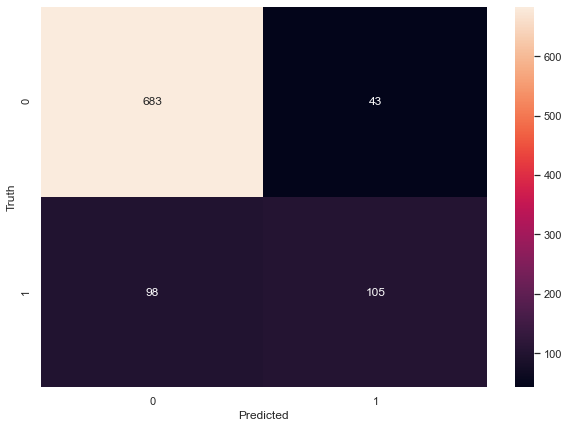

In [121]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [122]:
y_test.shape

(929,)

# Accuracy

In [123]:
round((683+105)/(683+105+43+98),2)

0.85

# Precision for 0 class

In [125]:
round(683/(683+98),2)

0.87

# Precision for 1 class

In [126]:
round(105/(105+43),2)

0.71

# Recall for 0 class

In [127]:
round(683/(683+43),2)

0.94

# Recall for 1 class

In [129]:
round(105/(105+98),2)

0.52